# Estatística básica com R

## Funções básicas

### Distribuição normal

- Cria vetor com valores aleatórios em distribuição normal.

In [1]:
rnorm(10)

[1]  1.38137694 -0.64680695 -0.07351518  1.72237166  0.31789687 -0.22498160
 [7]  1.08975582  1.36329457 -0.46667178 -2.02837528

### Média

- Média

In [2]:
mean(1:100)

[1] 50.5

### Mediana

- Valor do meio, que separa as metadas (ou a média dos dois centrais)

In [3]:
median(1:100)

[1] 50.5

### Média ponderada


In [4]:
weighted.mean(1:10, 1:10)

[1] 7

### Desvio padrão

- Grau de dispersão dos valores
- Medida de dispersão ao redor da média dos valores
- Um valor pequeno significa amplitude pequena ao redor da média, pouco dispersos.
- Um valor grande significa amplitude grande ao redor da média, muito dispersos.

In [19]:
sd(c(22, 7, 19, 8, 9, 19, 10))

[1] 6.294366

### Valor mínimo

In [6]:
min(1:100)

[1] 1

### Valor máximo

In [7]:
max(1:100)

[1] 100

### Quartis

In [15]:
quantile(rnorm(100))

0%         25%         50%         75%        100% 
-1.82955217 -0.56768034  0.07460981  0.70029571  2.49458404

### summary

- Algumas estatísticas básicas

In [14]:
summary(1:100)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   25.75   50.50   50.50   75.25  100.00 

### Amplitude

- Medida de dispersão
- Diferença entre o menor e o maior valor de uma amosrta

In [16]:
x <- c(22, 7, 19, 8, 9, 19, 10)

In [17]:
range(x)

[1]  7 22

In [18]:
diff(range(x))

[1] 15

### Coeficiente de variação

- Desvio padrão em porcentagem da média
- Muito afetado pela escala dos valores


In [20]:
x <- c(22, 7, 19, 8, 9, 19, 10)
sd(x) / mean(x) * 100

[1] 46.87294

## Tabela de frequências de dados categóricos

- Frequência relativa = frequência da categoria / soma total das frequências
- Frequência % = Frequência relativa * 100

In [37]:
categorias <- c('Inicial', 'Normal', 'Silver', 'Gold', 'Platinum')

In [39]:
v_categorias <- sample(categorias, 7000, replace = TRUE)

In [64]:
v_frequencias = table(v_categorias) # Cria uma tabela de frequências
v_frequencias

v_categorias
    Gold  Inicial   Normal Platinum   Silver 
    1402     1438     1399     1394     1367 

In [70]:
v_frequencias <- v_frequencias[categorias] # Reordena as colunas
v_frequencias <- as.vector(v_frequencias) # Converte para um vetor
v_frequencias

[1] 1438 1399 1367 1402 1394

In [71]:
prop.table(v_frequencias) # Frequência relativa

[1] 0.2054286 0.1998571 0.1952857 0.2002857 0.1991429

In [72]:
prop.table(v_frequencias) * 100 # Frequência %

[1] 20.54286 19.98571 19.52857 20.02857 19.91429

In [75]:
df <- data.frame('Tipo Cliente' = categorias,
           'Frequência' = v_frequencias,
           'Fr Relativa' = prop.table(v_frequencias),
           'Fr %' = prop.table(v_frequencias) * 100)

df

Tipo.Cliente,Frequência,Fr.Relativa,Fr..
Inicial,1438,0.2054286,20.54286
Normal,1399,0.1998571,19.98571
Silver,1367,0.1952857,19.52857
Gold,1402,0.2002857,20.02857
Platinum,1394,0.1991429,19.91429


In [77]:
apply(df[, -1], 2, sum)

Frequência Fr.Relativa        Fr.. 
       7000           1         100

### Tabela de frequência da base Iris

In [78]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


#### Descobrindo a frequência absoluta das espécies na base

In [88]:
frequencia_abs <- table(iris$Species)
frequencia_abs


    setosa versicolor  virginica 
        50         50         50 

#### Descobrindo a frequência relativa

In [91]:
frequencia_rel <- prop.table(frequencia_abs)
frequencia_rel


    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

#### Montando o dataframe final

In [104]:
data.frame('Espécie'= names(frequencia_abs),
          'Frequência'= as.vector(frequencia_abs),
          'Relativa'= as.vector(frequencia_rel),
          'Percentagem'= as.vector(frequencia_rel) * 100)

Espécie,Frequência,Relativa,Percentagem
setosa,50,0.3333333,33.33333
versicolor,50,0.3333333,33.33333
virginica,50,0.3333333,33.33333


#### Para descobrir a frequência dada uma condição

In [85]:
table(iris$Sepal.Length > 5)


FALSE  TRUE 
   32   118 

## Tabela de frequência de dados não categóricos

- Precisamos definir classes e calcular a frequência para essas classes

#### Dada a base

In [110]:
dados <- c(38, 15, 43, 85, 36, 15, 96, 35, 20, 29, 76, 39, 18, 14, 37, 
           39, 68, 63, 96, 86, 45, 89, 94, 60, 73, 60, 59, 73, 52, 32)

dados

[1] 38 15 43 85 36 15 96 35 20 29 76 39 18 14 37 39 68 63 96 86 45 89 94 60 73
[26] 60 59 73 52 32

In [111]:
summary(dados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   35.25   48.50   52.83   73.00   96.00 

#### O dividiremos em classes

In [106]:
interval <- seq(0, 100, 25)
interval

[1]   0  25  50  75 100

In [107]:
classes <- c('0 - 24', '25 - 49', '50 - 74', '75 - 100')
classes

[1] "0 - 24"   "25 - 49"  "50 - 74"  "75 - 100"

In [126]:
dados_categorizados <- cut(dados, breaks = interval, right = FALSE, labels = classes)
dados_categorizados

[1] 25 - 49  0 - 24   25 - 49  75 - 100 25 - 49  0 - 24   75 - 100 25 - 49 
 [9] 0 - 24   25 - 49  75 - 100 25 - 49  0 - 24   0 - 24   25 - 49  25 - 49 
[17] 50 - 74  50 - 74  75 - 100 75 - 100 25 - 49  75 - 100 75 - 100 50 - 74 
[25] 50 - 74  50 - 74  50 - 74  50 - 74  50 - 74  25 - 49 
Levels: 0 - 24 25 - 49 50 - 74 75 - 100

#### E seguiremos com a criação da tabela de frequências

In [130]:
abs <- as.vector(table(dados_categorizados))
abs

[1]  5 10  8  7

In [134]:
rel <- prop.table(abs)
rel

[1] 0.1666667 0.3333333 0.2666667 0.2333333

In [137]:
df <- data.frame('Classe'= classes,
           'Freq abs' = abs,
           'Freq rel' = rel,
           'Freq Percentual' = rel * 100)

df

Classe,Freq.abs,Freq.rel,Freq.Percentual
0 - 24,5,0.1666667,16.66667
25 - 49,10,0.3333333,33.33333
50 - 74,8,0.2666667,26.66667
75 - 100,7,0.2333333,23.33333


#### Para validar:

In [138]:
apply(df[, -1], 2, sum)

Freq.abs        Freq.rel Freq.Percentual 
             30               1             100

## Gráficos

### Gráfico de tabela de frequências

In [146]:
dados <- c(38, 15, 43, 85, 36, 15, 96, 35, 20, 29, 76, 39, 18, 14, 37, 
           39, 68, 63, 96, 86, 45, 89, 94, 60, 73, 60, 59, 73, 52, 32)

interval <- seq(0, 100, 25)

classes <- c('0 - 24', '25 - 49', '50 - 74', '75 - 100')

dados_categorizados <- cut(dados, breaks = interval, right = FALSE, labels = classes)

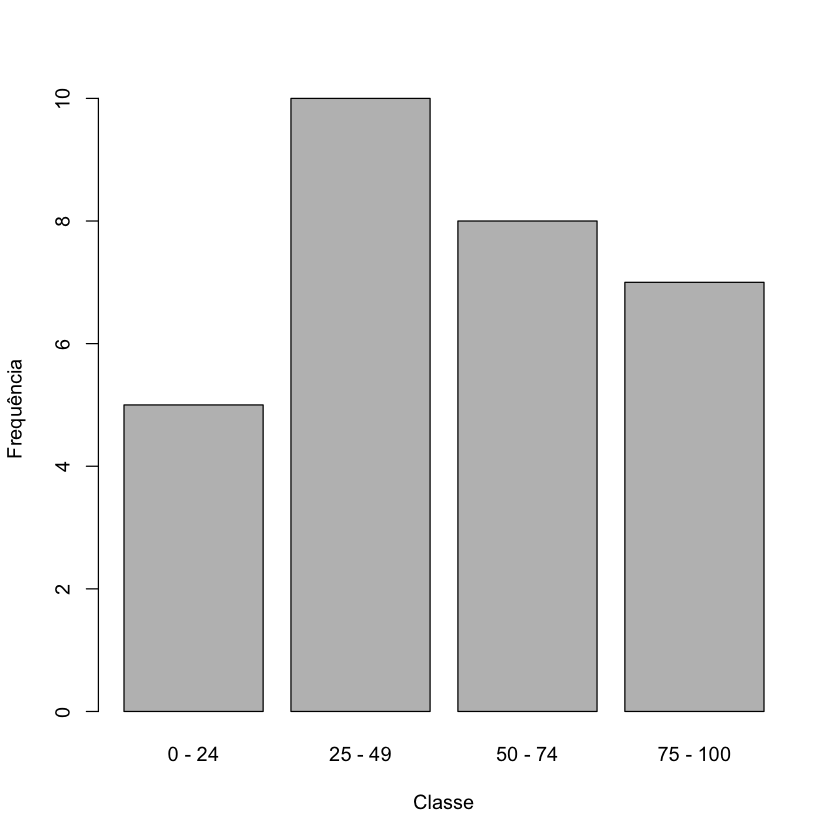

In [147]:
plot(dados_categorizados, xlab = 'Classe', ylab = 'Frequência')

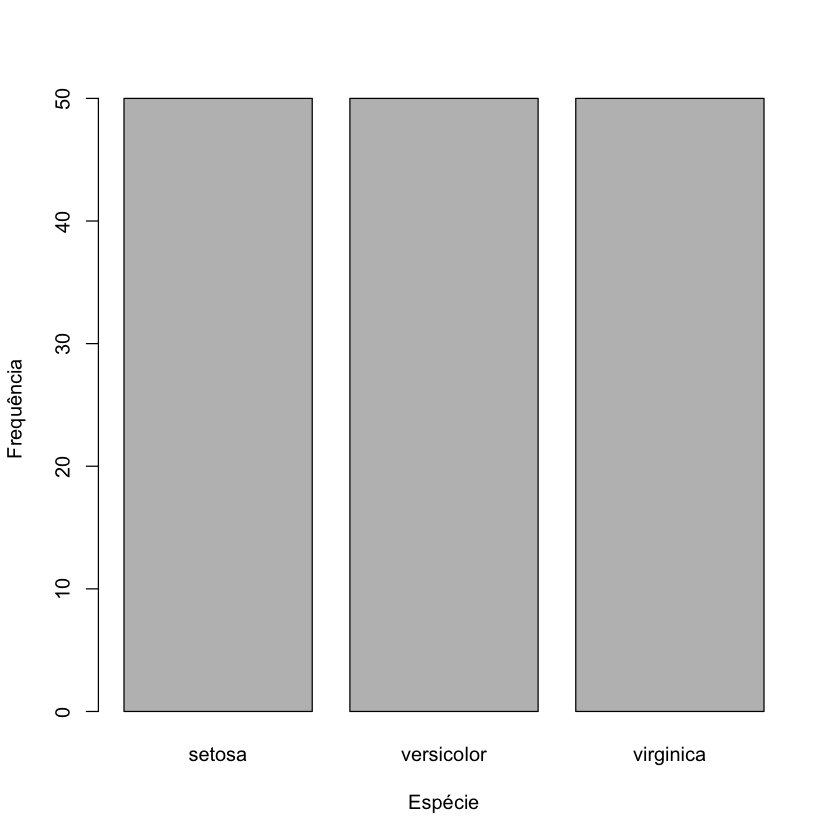

In [140]:
plot(iris$Species, xlab = 'Espécie', ylab = 'Frequência')

### Histograma

In [148]:
dados <- c(38, 15, 43, 85, 36, 15, 96, 35, 20, 29, 76, 39, 18, 14, 37, 
           39, 68, 63, 96, 86, 45, 89, 94, 60, 73, 60, 59, 73, 52, 32)

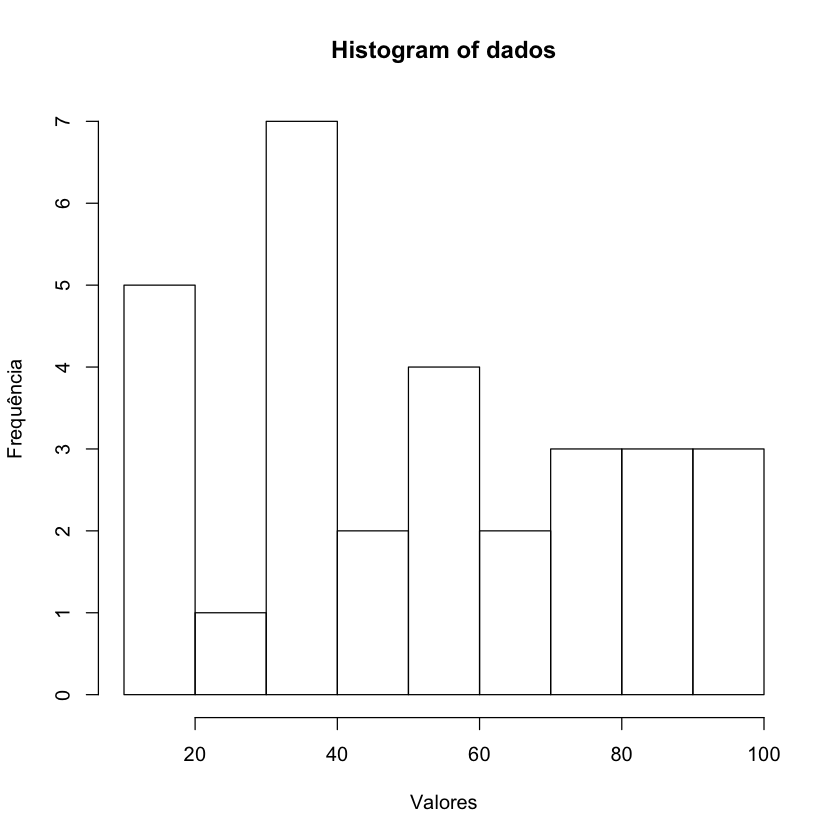

In [149]:
hist(dados, xlab = 'Valores', ylab = 'Frequência')

### Gráfico de dispersão

In [151]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [159]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

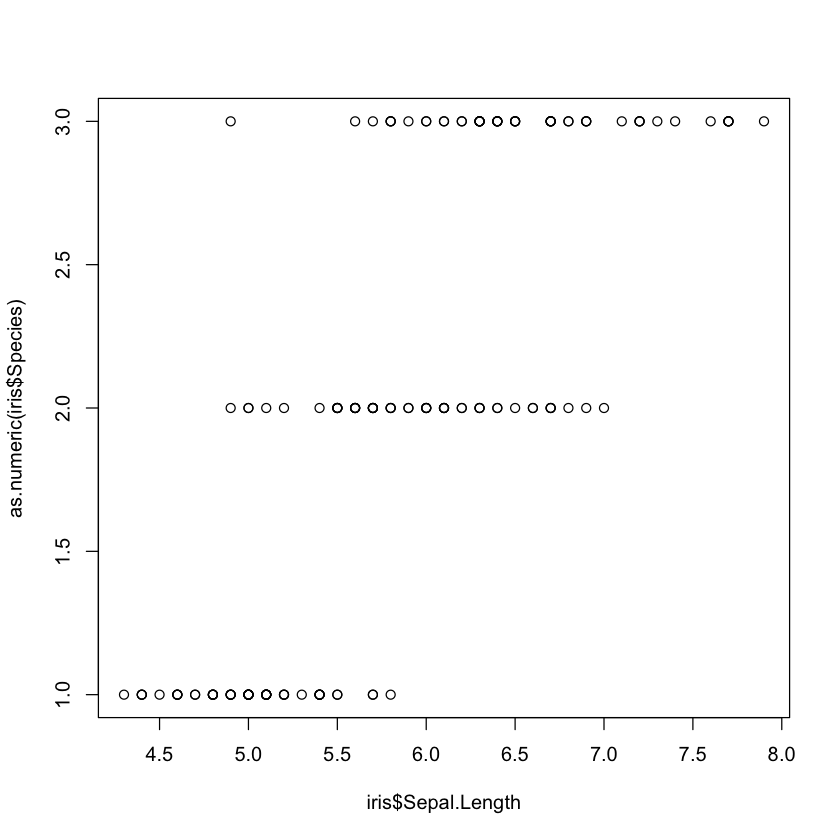

In [168]:
plot(iris$Sepal.Length, as.numeric(iris$Species))

#### Outro exemplo de gráfico de dispersão

In [169]:
n_dados <- 100
v_temp <- sample(0:45, n_dados, replace = TRUE)
v_altitude <- sample(0:1200, n_dados, replace = TRUE)
df <- data.frame(temperatura = v_temp, altitude = v_altitude)

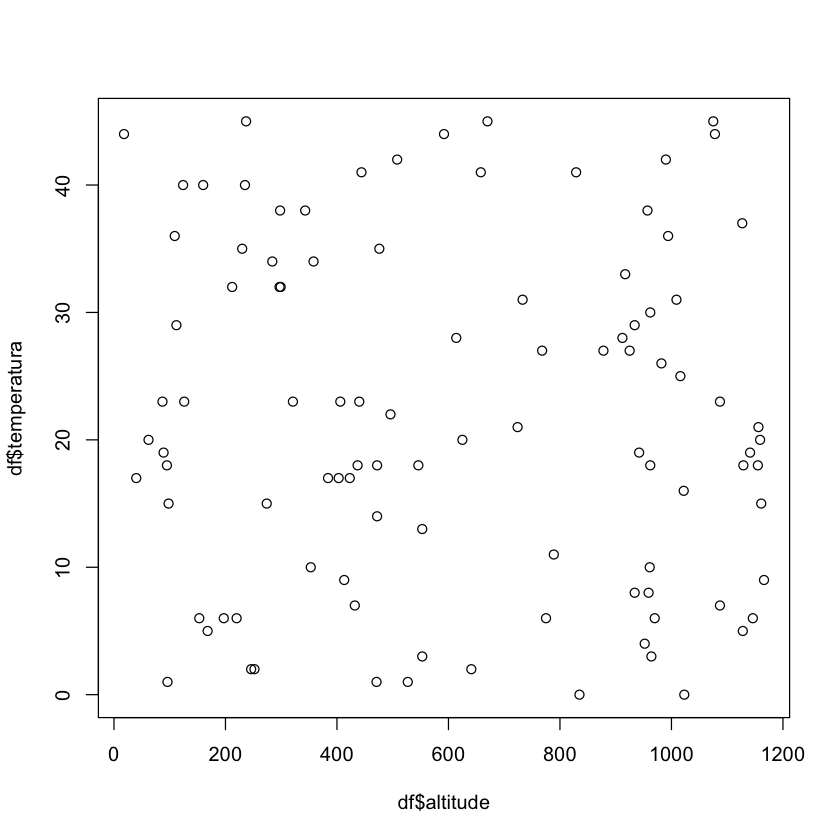

In [170]:
plot(df$altitude, df$temperatura)

### Gráfico de linhas

In [181]:
x <- 1:20
y <- rnorm(20)

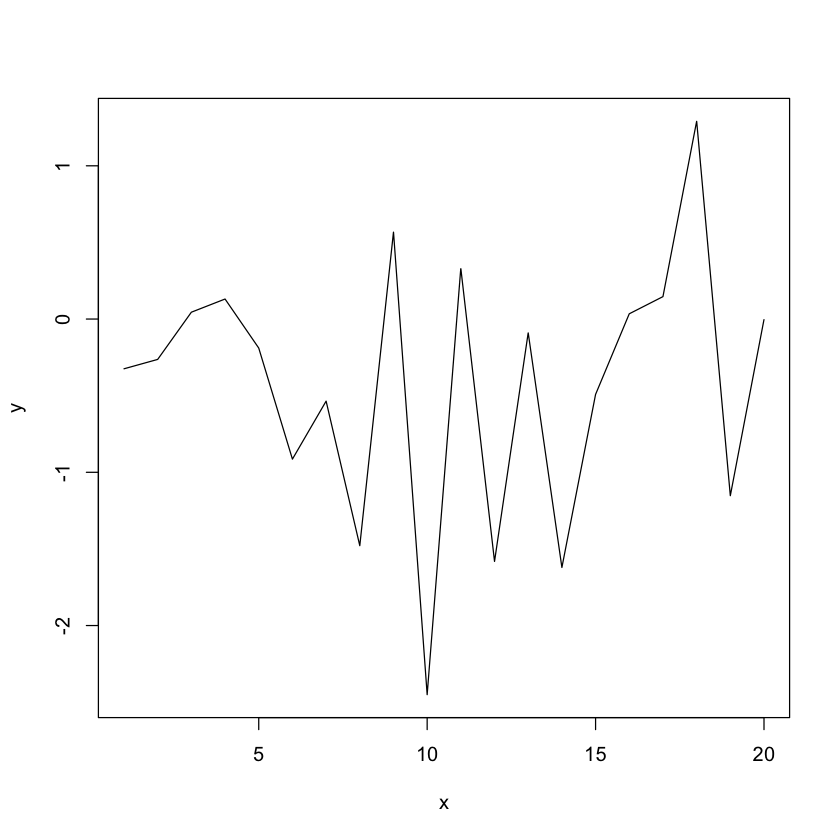

In [184]:
plot(x, y, type = 'l')

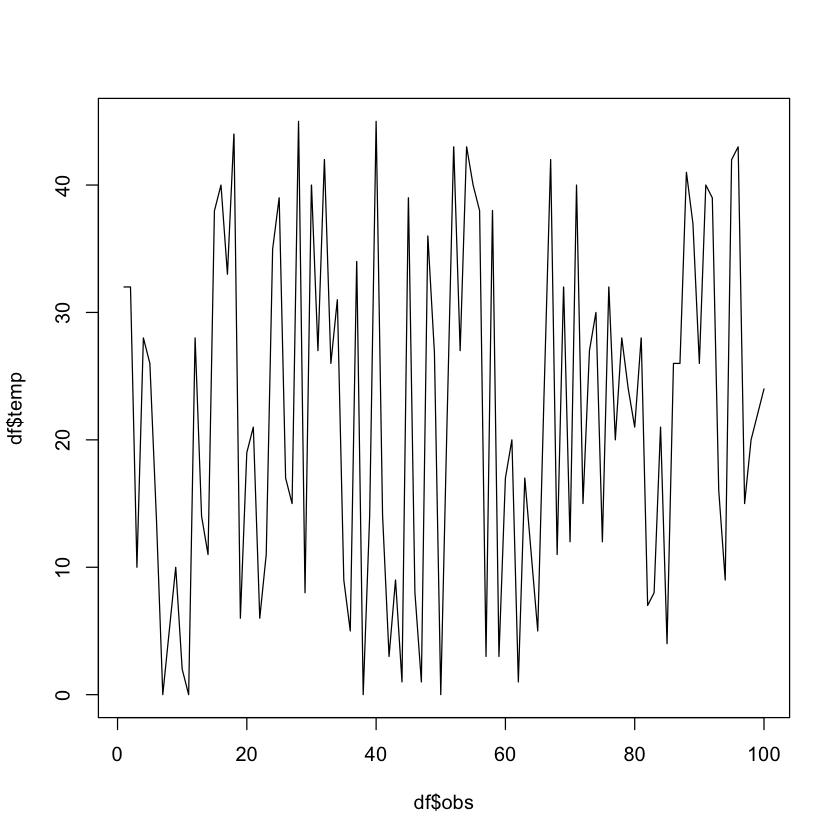

In [188]:
n_dados <- 100
v_temp <- sample(0:45, n_dados, replace = TRUE)
v_obs <- 1:n_dados
df <- data.frame(obs = v_obs, temp = v_temp)

plot(df$obs, df$temp, type = 'l')

#### Podemos adicionar uma linha indicando a média

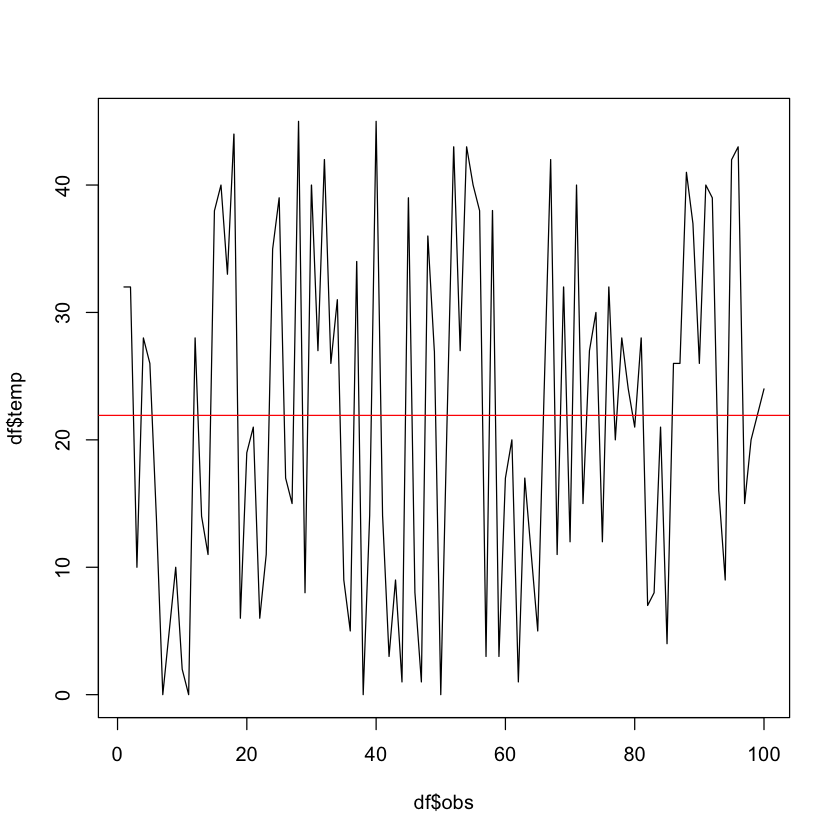

In [189]:
plot(df$obs, df$temp, type = 'l')
abline(h = mean(df$temp), col = 'red')

### Gráfico de barras

#### plot

In [195]:
grupoA <- rep('Grupo A', 30)
grupoB <- rep('Grupo B', 20)
grupoC <- rep('Grupo C', 9)
grupos <- c(grupoA, grupoB, grupoC)
grupos <- table(grupos)

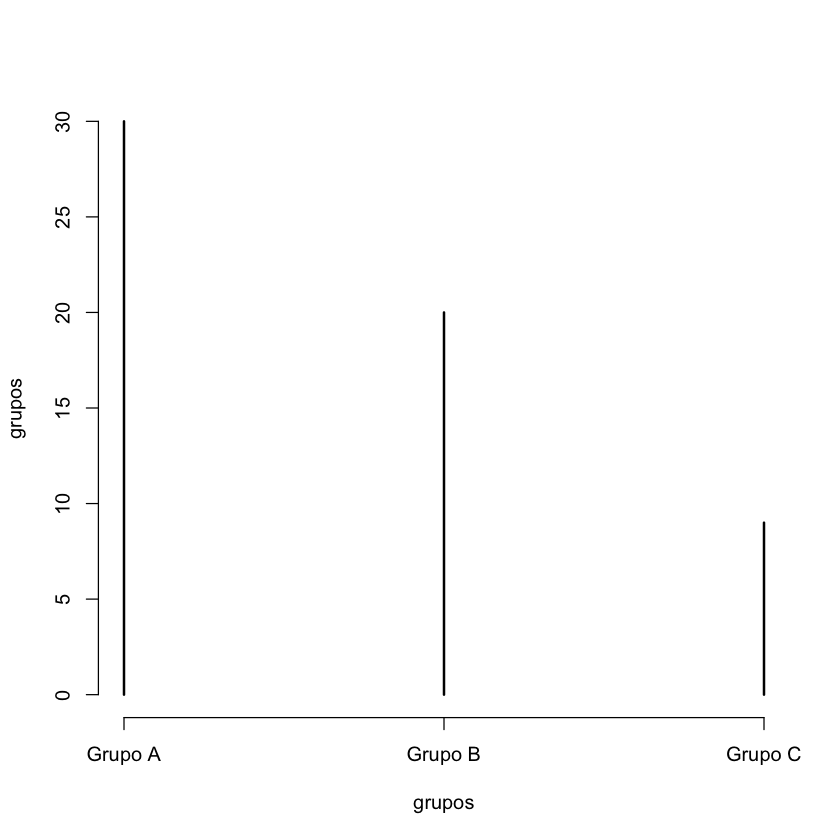

In [196]:
plot(grupos)

#### barplot

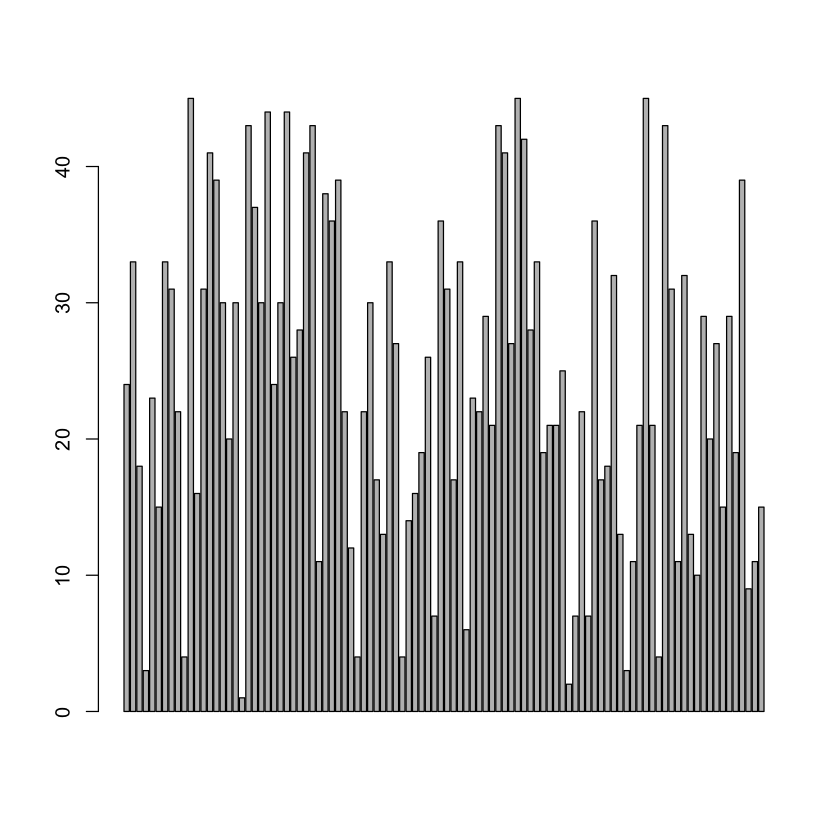

In [197]:
n_dados <- 100
v_temp <- sample(0:45, n_dados, replace = TRUE)
v_obs <- 1:n_dados
df <- data.frame(obs = v_obs, temp = v_temp)

barplot(df$temp)